In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv("kl.csv", encoding='ISO-8859-1')

In [3]:
df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31.0,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94.0,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226.5M
1,1,20801,Cristiano Ronaldo,33.0,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94.0,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127.1M
2,2,190871,Neymar Jr,26.0,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92.0,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228.1M
3,3,193080,De Gea,27.0,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91.0,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138.6M
4,4,192985,K. De Bruyne,27.0,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91.0,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196.4M


In [4]:
#Removing columns that are redunant
df_cleaned = df.drop(columns=[
    'ID', 'Photo', 'Flag', 'Club Logo', 'Real Face', 'Body Type',
    'Joined', 'Loaned From', 'Contract Valid Until', 'Jersey Number',
    'Release Clause'
], errors='ignore')

print("Shape after dropping irrelevant columns:", df_cleaned.shape)


Shape after dropping irrelevant columns: (18207, 78)


In [5]:
# Filling missing numeric values with the column mean
numeric_cols = df_cleaned.select_dtypes(include='number').columns
df_cleaned[numeric_cols] = df_cleaned[numeric_cols].fillna(df_cleaned[numeric_cols].mean())

# Filling missing categorical values with the most common entry
categorical_cols = df_cleaned.select_dtypes(include='object').columns
df_cleaned[categorical_cols] = df_cleaned[categorical_cols].fillna(df_cleaned[categorical_cols].mode().iloc[0])


In [6]:
def simplify_role(pos):
    if pos in ['CB', 'LB', 'RB', 'LCB', 'RCB', 'LWB', 'RWB']:
        return 'Defender'
    elif pos in ['CM', 'CDM', 'CAM', 'LM', 'RM', 'LDM', 'RDM', 'LCM', 'RCM']:
        return 'Midfielder'
    else:
        return 'Attacker'
        
df_cleaned['Simplified_Role'] = df_cleaned['Position'].apply(simplify_role)


In [7]:
features = [
    'Overall', 'Potential', 'Crossing', 'Finishing', 'HeadingAccuracy',
    'ShortPassing', 'Dribbling', 'LongPassing', 'BallControl', 
    'Acceleration', 'SprintSpeed', 'Agility', 'Stamina', 'Strength',
    'Interceptions', 'Positioning', 'Marking', 'StandingTackle', 'SlidingTackle'
]

In [8]:
## feature engineering

In [9]:
df_cleaned['Height_cm'] = df['Height'].str.extract(r'(\d+)').astype(float) * 2.54  # convert from feet/inches
df_cleaned['Weight_kg'] = df['Weight'].str.replace('lbs', '').astype(float) * 0.453592
df_cleaned['BMI'] = df_cleaned['Weight_kg'] / (df_cleaned['Height_cm']/100)**2


In [10]:
y = df_cleaned['Simplified_Role']


In [11]:

if 'BMI' in df_cleaned.columns:
    X = df_cleaned[features + ['BMI']]
else:

    X = df_cleaned[features]
   
y = df_cleaned['Simplified_Role']

In [12]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# rf = RandomForestClassifier(n_estimators=100, random_state=42)
# rf.fit(X_train, y_train)

# Now split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [13]:
y_pred = rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8786381109280615

Classification Report:
               precision    recall  f1-score   support

    Attacker       0.91      0.86      0.88      1130
    Defender       0.90      0.94      0.92      1113
  Midfielder       0.84      0.85      0.84      1399

    accuracy                           0.88      3642
   macro avg       0.88      0.88      0.88      3642
weighted avg       0.88      0.88      0.88      3642


Confusion Matrix:
 [[ 967    3  160]
 [   0 1042   71]
 [  94  114 1191]]


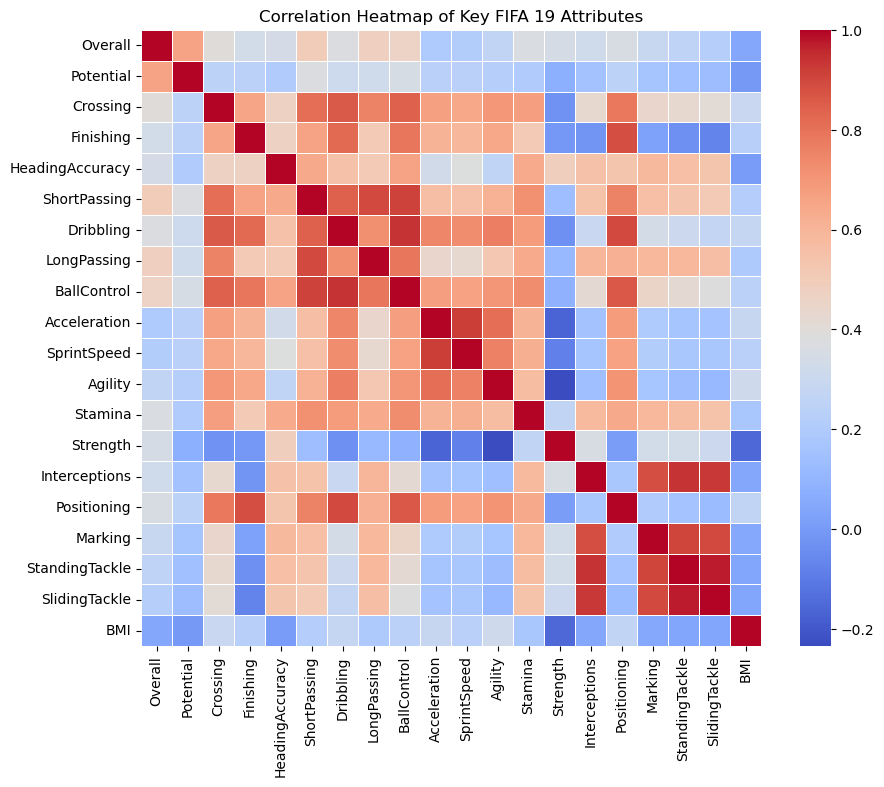

In [14]:
plt.figure(figsize=(10,8))
sns.heatmap(
    df_cleaned[features + ['BMI']].corr(),
    cmap='coolwarm',
    annot=False,
    linewidths=0.5
)
plt.title('Correlation Heatmap of Key FIFA 19 Attributes')
plt.show()


C:\Users\enobo\AppData\Local\Temp\ipykernel_6980\3964901186.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_cleaned, x='Simplified_Role', y='Overall', palette='viridis')


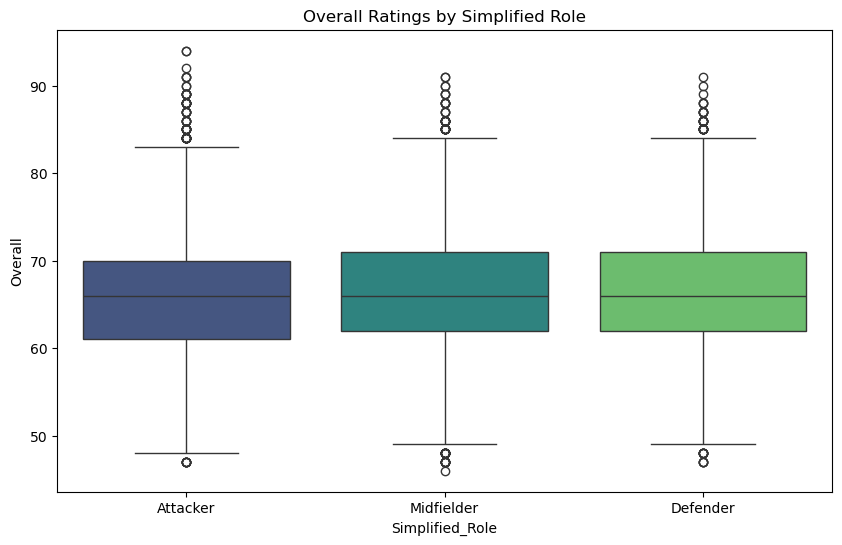

C:\Users\enobo\AppData\Local\Temp\ipykernel_6980\3964901186.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_cleaned, x='Simplified_Role', y='Finishing', palette='magma')


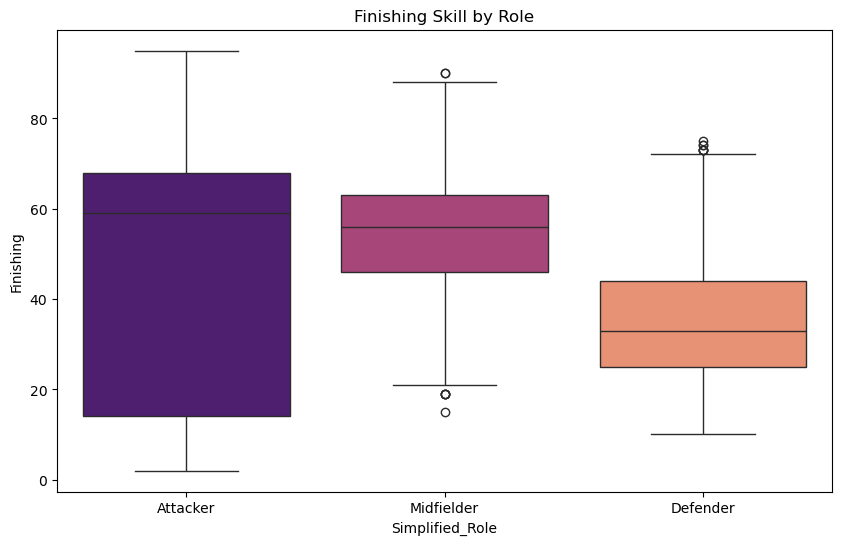

In [15]:
key_attributes = ['Finishing', 'ShortPassing', 'Dribbling', 'Defending', 'Physical']

plt.figure(figsize=(10,6))
sns.boxplot(data=df_cleaned, x='Simplified_Role', y='Overall', palette='viridis')
plt.title('Overall Ratings by Simplified Role')
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(data=df_cleaned, x='Simplified_Role', y='Finishing', palette='magma')
plt.title('Finishing Skill by Role')
plt.show()


In [17]:
import shap

# Create the explainer for your Random Forest
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X)

shap.summary_plot(shap_values[1], X)
shap.summary_plot(shap_values[1], X, plot_type="bar")
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1][0,:], X.iloc[0,:])
shap.dependence_plot("feature_name", shap_values[1], X)


AssertionError: The shape of the shap_values matrix does not match the shape of the provided data matrix.

In [ ]:
pip install lime
